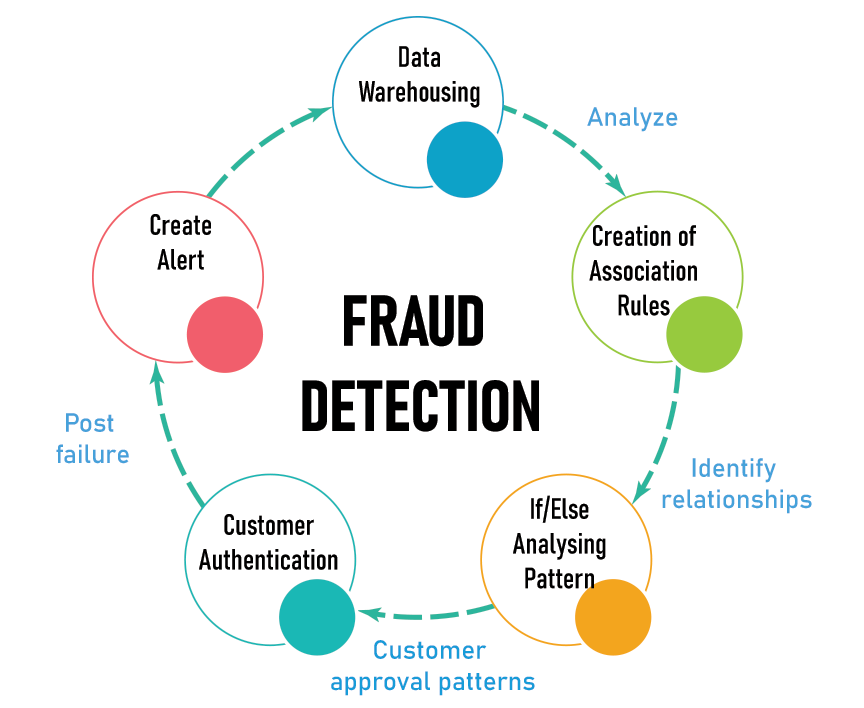

*Credit card fraud detection*
is like a smart security system for your money. It watches your spending habits and looks for anything unusual—like a big purchase in a different country. If something seems off, it can block the transaction or alert you.

Some systems follow simple rules, while others use machine learning to spot sneaky patterns. The challenge is catching fraud without stopping real purchases by mistake. In the end, it's all about protecting you and your bank from losing money.

In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 20.1 MB/s eta 0:00:00


In [30]:
import optuna
import xgboost as xgb
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score,\
recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

After importing necessary libraries, we should load our *Credit Card Dataset ( [kaggle dataset link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud))*

In [4]:
dz = ZipFile('/content/archive.zip')
data = pd.read_csv(dz.open('creditcard.csv'))
data_copy = data.copy()

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.shape

(284807, 31)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

<Axes: >

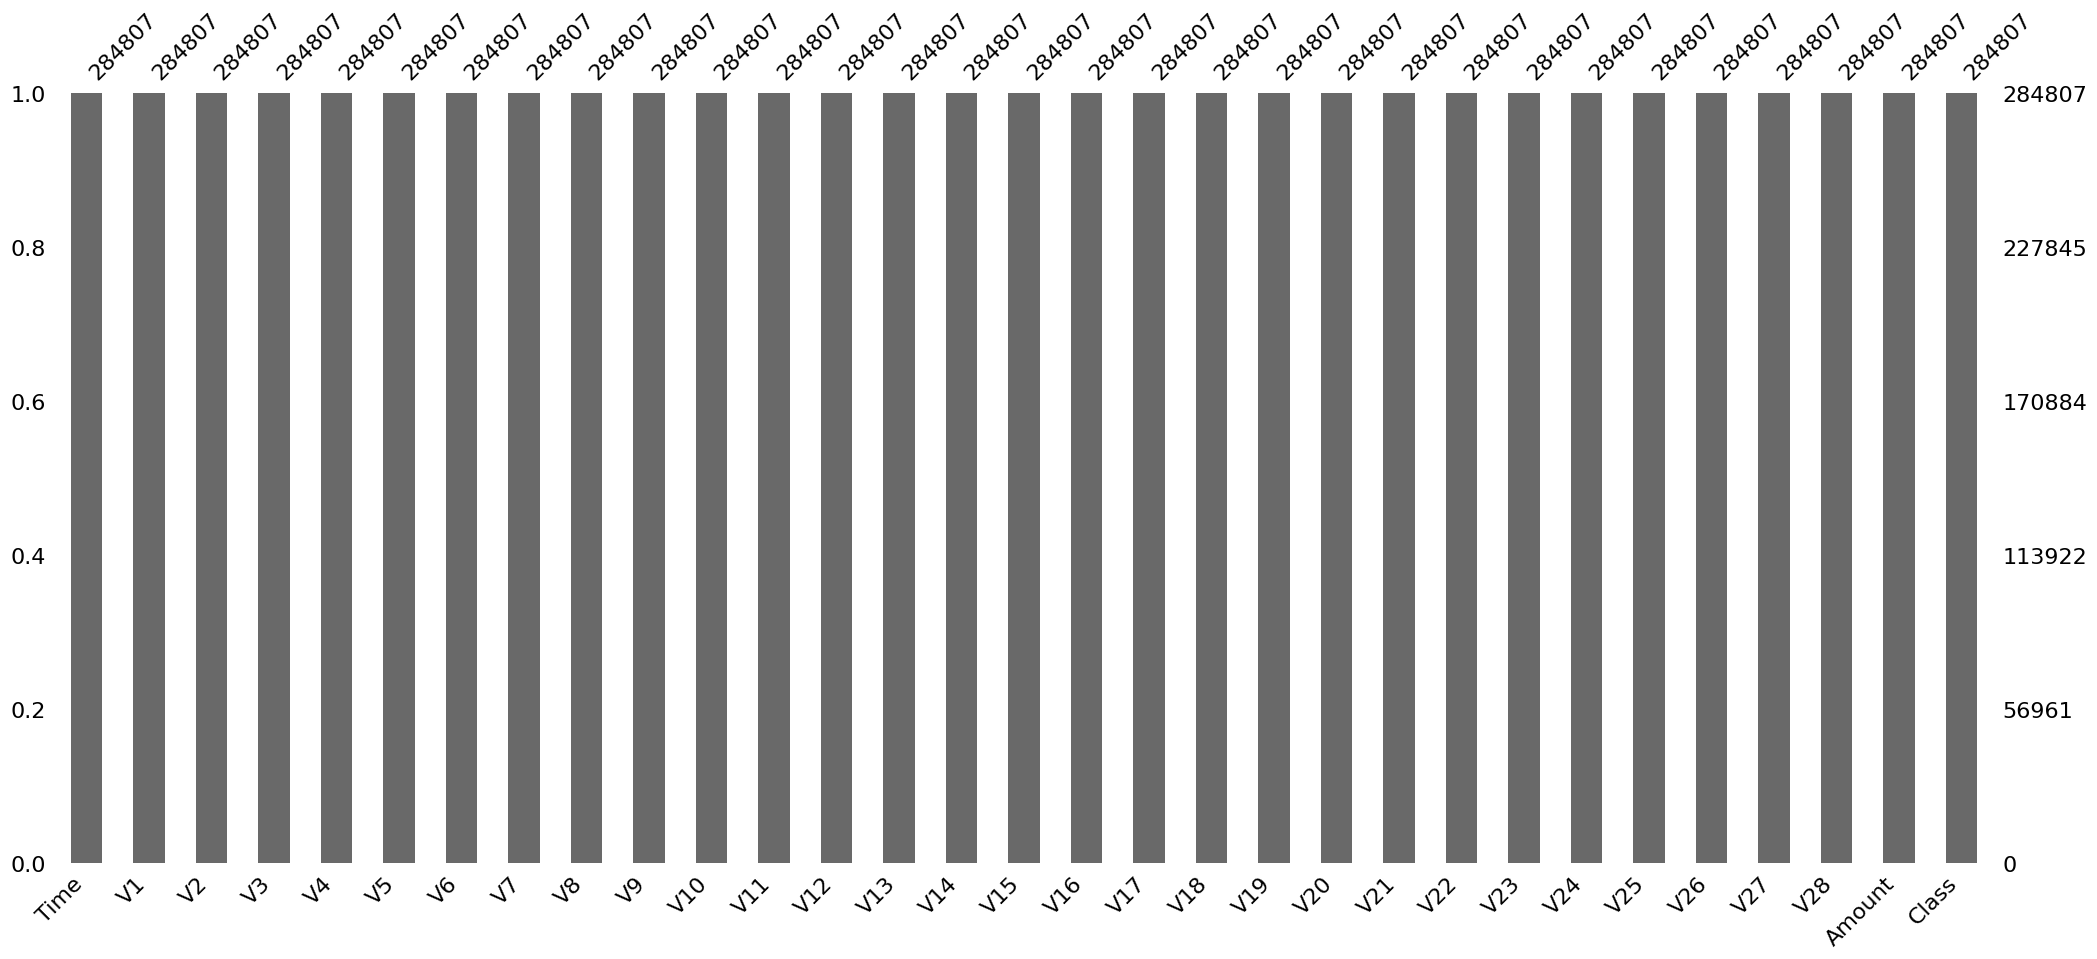

In [9]:
ms.bar(data)

*missingo* is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

In [10]:
#Our target column will be "Class", however before creating X and y, let's count its values

print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


First of all, let's explain the column explicitly, in here we have *2 values (0 and 1)*

*   0 -> the transaction is normal.
*   1 -> the transaction is fraudulent.

In out dataset consists of **284315 normal and 492 fraudulent** data.

*Yeah, spotting the imbalance is like finding a glitch in the Matrix — cool, but in machine learning, even the tiniest detail can flip your model upside down… so notice it, respect it, but don’t build a temple around it!*


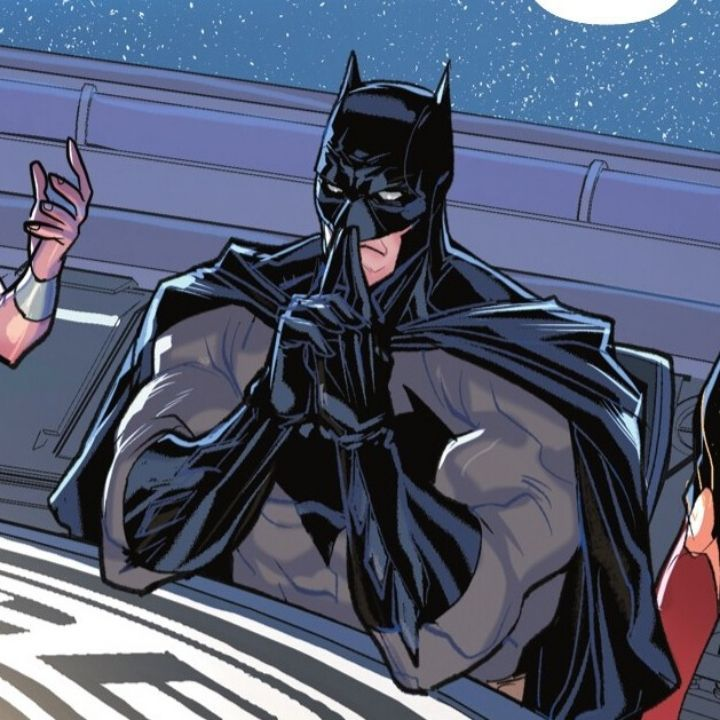

In [11]:
# Split data into features and target

y = data['Class']
x = data.drop(columns = 'Class')

print(x.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [12]:
# Scaling the features

sc = StandardScaler()
x = sc.fit_transform(x)

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


In [13]:
# Split data into train(80%) and test(20%) sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

* Why *stratify = y*?

Stratification refers to a method used during data splitting (e.g., in train-test splits or cross-validation) to ensure that the proportion of classes in the target variable is preserved across all subsets. In the context of our dataset for fraud detection, where the target variable "Class" is highly imbalanced (approximately 0.17% fraud cases, Class=1, and 99.83% non-fraud cases, Class=0), stratification plays a crucial role to maintain representative class distributions in both training and test sets.

In fact, without stratification, random splitting could result in subsets with disproportionate class ratios, such as a training set with few or no fraud cases, leading to poor model learning, or a test set with an unrealistic number of frauds, yielding misleading performance metrics (e.g., precision, recall, F1 score). For that reason, it ensures that each subset reflects the original dataset’s class distribution, enabling the model (e.g., XGBoost in your project) to train effectively on fraud patterns and providing reliable evaluation metrics for imbalanced data.

In a nutshell, stratification ensures that both training and testing sets have the same class proportions as the original dataset — which is crucial for imbalanced datasets like fraud detection.

In [14]:
negative, positive = np.bincount(y_train)
scale_positive_weight = negative / positive
print(f"Scale pos weight: {scale_positive_weight:.2f}")

Scale pos weight: 577.29


The code figures out how to balance the super-rare fraud cases (Class = 1, 0.17%) against non-frauds (Class = 0, 99.83%) for XGBoost. It uses np.bincount(y_train) to count non-frauds (negative) and frauds (positive) in the training data. Then, it calculates *scale_pos_weight = negative / positive*, which is the ratio of non-frauds to frauds (e.g., 227,452 non-frauds ÷ 394 frauds ≈ 577). This tells XGBoost to care approx. 577 times more about getting frauds right, so it doesn’t just ignore them due to the imbalance.

In [15]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'scale_pos_weight': scale_positive_weight,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log = True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)}

    model = xgb.XGBClassifier(**params, use_label_encoder=False)

    scoring = {'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'roc_auc': 'roc_auc'}
    scores = cross_validate(model, x_train, y_train, cv = 5, scoring = scoring, return_train_score = False)

    # As a result, return mean F1 score as the objective to maximize
    return scores['test_f1'].mean()

Optuna is a tool for tuning hyperparameters, like finding the perfect settings for XGBoost model to catch those rare frauds in the dataset. Think of it as a smart DJ tweaking the knobs on a soundboard to get the best mix. Instead of you manually trying tons of settings (like Grid Search, which is slow and boring), Optuna uses clever algorithms to test different combos, learn what works, and zero in on the best ones fast. It’s built for speed and can handle complex models like XGBoost, making it perfect for your project.

Furthermore, it tries smarter combos, not just every possibility, so it’s way faster than Grid Search. You can tell it what to optimize (like F1 score for your imbalanced fraud data). It works with any model (XGBoost, Random Forest, even neural nets) and runs smoothly in Python.

In addition, in the above code the heart of Optuna setup. It’s like a recipe for testing XGBoost settings to find the best ones for fraud detection. Let's explain each of them explicitly.

1) def objective(trial), is what Optuna calls over and over to try different hyperparameter combos. The hyperparameters;
  * *learning_rate*: How fast the model learns.
  * *max_depth*: How deep the trees grow.
  * *min_child_weight*: Stops trees from splitting too much.
  * *subsample*: Uses part of the data for each tree.
  * *colsample_bytree*: Uses some features per tree.
  * *n_estimators*: Number of trees.
  * *reg_alpha and reg_lambda*: Regularization to avoid overfitting.
  * *objective: 'binary:logistic'* (for fraud vs. non-fraud)
  * *eval_metric: 'auc'* (good for imbalanced data).
  * *scale_pos_weight: * 577 ratio, we calculated to focus on rare frauds.

2) building the Model, it creates an XGBoost model with those settings.
  * *testing with Cross-Validation:* Runs 5-fold cross-validation on training data. Moreover, it checks precision, recall, F1 score, and AUC-ROC to see how good the model is at catching frauds.
  * *scoring:* Returns the average F1 score across the 5 folds. Optuna uses this to decide which settings rock, since F1 balances catching frauds (recall) and avoiding false alarms (precision).

In conlcusion, in here, optuna tests approx. 50 different XGBoost setups to maximize the F1 score. Since fraud cases are only 0.17%, F1 is a smart choice to balance precision and recall. The scale_pos_weight helps XGBoost focus on rare frauds, and AUC-ROC ensures reliable evaluation on imbalanced data. In the end, Optuna finds the best parameters to train your final model for testing.

In [17]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 50)  # Run 50 trials for tuning
best_params = study.best_params

print(f"Best parameters: {best_params}")
print(f"Best F1: {study.best_value}")

[I 2025-07-09 13:29:19,958] A new study created in memory with name: no-name-cbc4de8b-6e67-4d58-84b1-32380d3d0af4
[I 2025-07-09 13:29:58,154] Trial 0 finished with value: 0.2033407401048422 and parameters: {'learning_rate': 0.011768297416160587, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5256351422098101, 'colsample_bytree': 0.6657979951731663, 'n_estimators': 304, 'reg_alpha': 5.5677565644769835, 'reg_lambda': 5.800292921522403}. Best is trial 0 with value: 0.2033407401048422.
[I 2025-07-09 13:31:00,334] Trial 1 finished with value: 0.5751846886156727 and parameters: {'learning_rate': 0.015257268266022563, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8693392986233454, 'colsample_bytree': 0.681815780930127, 'n_estimators': 373, 'reg_alpha': 7.0276510777727, 'reg_lambda': 6.781176799096656}. Best is trial 1 with value: 0.5751846886156727.
[I 2025-07-09 13:31:25,733] Trial 2 finished with value: 0.804195440003749 and parameters: {'learning_rate': 0.1512229300508075, 

Best parameters: {'learning_rate': 0.16680375498358022, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.822357489018446, 'colsample_bytree': 0.8728991390480698, 'n_estimators': 321, 'reg_alpha': 0.5748186598830508, 'reg_lambda': 2.500935651109506}
Best F1: 0.8626332314302239


Above code initializes an Optuna study to perform hyperparameter tuning with the goal of maximizing the F1 score. It runs 50 optimization trials, each testing different combinations of hyperparameters for the model. After the optimization, it retrieves the best-performing parameters and the corresponding F1 score.

In [18]:
final_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_positive_weight, **best_params}

final_model = xgb.XGBClassifier(**final_params, use_label_encoder=False)
final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8728991390480698, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16680375498358022,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=321, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The final dictionary combines the fixed settings for binary classification (objective, eval_metric, and scale_pos_weight) with the best hyperparameters found by Optuna. Using these parameters, an XGBClassifier is initialized and trained on the training data with fit(). This final model represents the best configuration discovered during hyperparameter tuning and is now ready for evaluation on the test set.

In [19]:
# Evaluation process

pred = final_model.predict(x_test)
pred_proba = final_model.predict_proba(x_test)[:, 1]

In [22]:
# Metrics
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred_proba)

print("\nTest Set Performance:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Test Set Performance:
Precision: 0.86
Recall: 0.85
F1 Score: 0.86
AUC-ROC: 0.98


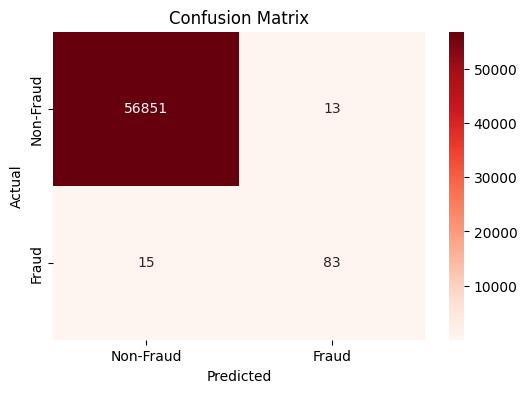

In [26]:
# Confusion Matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds',
            xticklabels = ['Non-Fraud', 'Fraud'],
            yticklabels = ['Non-Fraud', 'Fraud'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

A confusion matrix is a table that shows how well your model did at predicting stuff, like frauds (Class=1) versus non-frauds (Class=0). It compares what your model predicted to what’s actually true, breaking it down into four boxes; true positives, true negatives, false positives, and false negatives. It’s super useful for fraud detection task because it shows how good XGBoost model is at catching frauds without flagging too many non-frauds.

* *True Positives (TP):* Model says fraud, and it’s actually fraud.
* *True Negatives (TN):* Model says non-fraud, and it’s actually non-fraud.
* *False Positives (FP):* Model says fraud, but it’s non-fraud.
* *False Negatives (FN):* Model says non-fraud, but it’s actually fraud.

From this, we can calculate;

* *Recall* = TP / (TP + FN)
* *Precision* = TP / (TP + FP)
* *F1 Score:* Balances precision and recall.

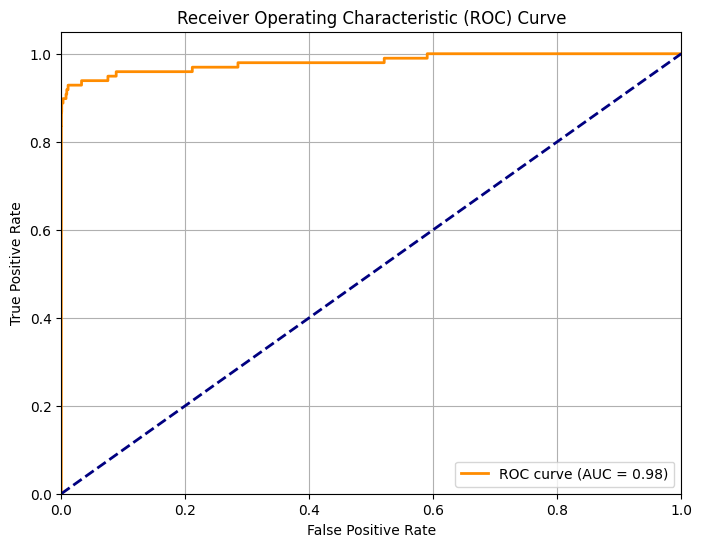

In [31]:
fpr, tpr, _ = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2,
         label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

ROC-AUC is a way to measure how good the model is at telling apart frauds (Class=1) from non-frauds (Class=0). The ROC part is a curve that plots True Positive Rate (TPR, a.k.a recall, or how many frauds you caught) against False Positive Rate (FPR, how many non-frauds you wrongly flagged as fraud) at different decision thresholds. The AUC is the area under this curve, giving a single number to show how well the model ranks frauds higher than non-frauds. A perfect model has AUC = 1.0; a random guess is 0.5.

* *ROC Curve:* Shows TPR (y-axis) vs. FPR (x-axis).
  * *TPR* = TP / (TP + FN): Fraction of frauds correctly caught.
  * *FPR* = FP / (FP + TN): Fraction of non-frauds wrongly flagged.
* *AUC:* The area under the ROC curve. Higher AUC means your model’s better at separating frauds from non-frauds without needing to pick a specific threshold.

In conclusion, after loading the creditcard.csv dataset, the X's features were scaled using StandardScaler to ensure consistency. The data was split into 80% training and 20% test sets, with stratification applied to maintain the 0.17% fraud proportion. Optuna performed 50 trials to optimize XGBoost hyperparameters, maximizing the F1 score through 5-fold cross-validation. The final model achieved strong performance on the test set: a precision of 0.86, indicating 86% of predicted frauds were correct; a recall of 0.85, capturing 85% of actual frauds; and an F1 score of 0.86, effectively balancing precision and recall. The AUC-ROC of 0.98 demonstrates excellent discrimination between fraud and non-fraud cases. By incorporating scale_positive_weight to address the significant class imbalance and utilizing a confusion matrix to visualize classification outcomes, the XGBoost model is well-equipped to detect rare fraud cases effectively.

***I WOULD LIKE TO EXPRESS MY SINCER GRATITUDE FOR YOUR TIME AND CONSIDERATION!***

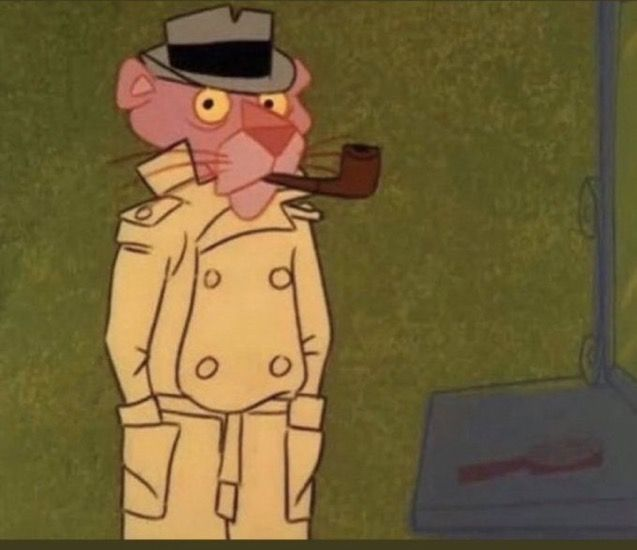